<h2 align=center> Principal Component Analysis</h2>

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

In [3]:
#data URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
#very high dimensional data
#PCA = reduce dimensionality

In [4]:
#load data
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#rename columns
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [6]:
#drop null
iris.dropna()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
#info
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
#shape
iris.shape

(150, 5)

## Data Visualization
---

<Figure size 2160x2160 with 0 Axes>

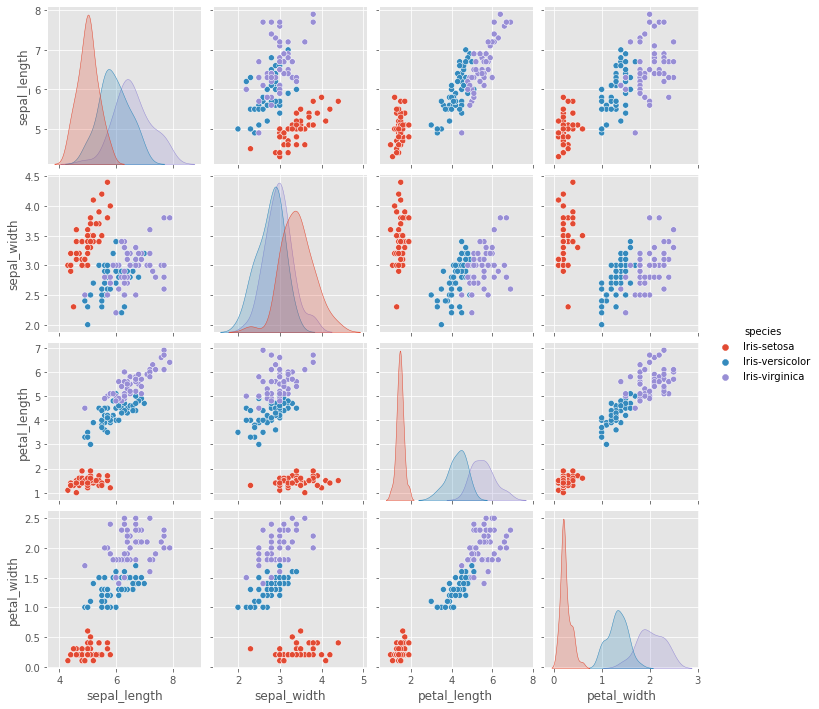

In [9]:
#plot
plt.figure(figsize=(30, 30))
sns.pairplot(iris, hue='species')

Text(0.5, 1.0, 'Sepal Length vs. Sepal Width')

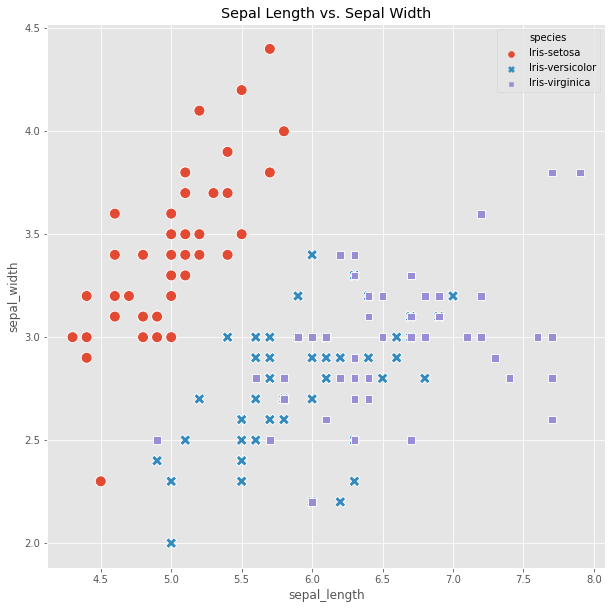

In [10]:
#plot
plt.figure(figsize=(10, 10))
sns.scatterplot(x=iris['sepal_length'],
            y=iris['sepal_width'],
            hue=iris['species'],
            style=iris['species'],
            s=120)
plt.title('Sepal Length vs. Sepal Width')

Text(0.5, 1.0, 'Petal Length vs. Petal Width')

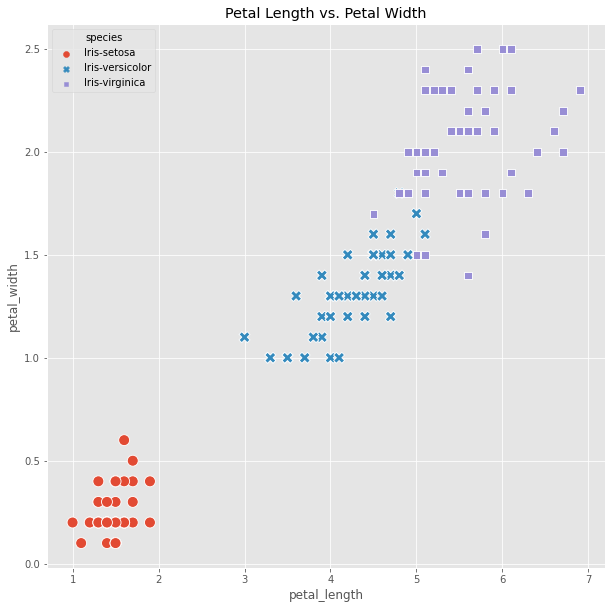

In [11]:
#plot
plt.figure(figsize=(10, 10))
sns.scatterplot(x=iris['petal_length'],
            y=iris['petal_width'],
            hue=iris['species'],
            style=iris['species'],
            s=120)
plt.title('Petal Length vs. Petal Width')

## Data Standardization
---

In [12]:
#define X, y

#feature matrix
X = iris.iloc[:, 0:4].values #select all rows of the first 4 columns

#target vector
y = iris['species'].values

In [13]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [14]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [15]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

## Compute the Eigenvectors and Eigenvalues
---

Covariance: $\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}(x_{ij}-\bar{x_j})(x_{ik}-\bar{x_k})$

Coviance matrix: $Σ = \frac{1}{n-1}((X-\bar{x})^T(X-\bar{x}))$

In [16]:
#calculate covariance
covariance_matrix = np.cov(X.T)
covariance_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

We can prove this by looking at the covariance matrix. It has the property that it is symmetric. We also constrain the each of the columns (eigenvectors) such that the values sum to one. Thus, they are orthonormal to each other.

Eigendecomposition of the covriance matrix:  $Σ = W\wedge W^{-1}$

In [20]:
#calculate eigendecomposition
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

#print
print('Eigen vectors:', '\n', eigen_vectors, '\n')
print('Eigen values:', '\n', eigen_values)

Eigen vectors: 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]] 

Eigen values: 
 [2.93035378 0.92740362 0.14834223 0.02074601]


## Singular Value Decomposition (SVD)
---

In [28]:
#calculate eigen vector
eigen_vectors_svd, s, v = np.linalg.svd(X.T)

#print
print('Eigen vectors SVD:', '\n', eigen_vec_svd, '\n')
print('s:', '\n', s, '\n') #s is eigen_values
print('v:', '\n', v)

Eigen vectors SVD: 
 [[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]] 

s: 
 [20.89551896 11.75513248  4.7013819   1.75816839] 

v: 
 [[ 1.08374515e-01  9.98503796e-02  1.13323362e-01 ... -7.27833114e-02
  -6.58701606e-02 -4.59092965e-02]
 [-4.30198387e-02  5.57547718e-02  2.70926177e-02 ... -2.26960075e-02
  -8.64611208e-02  1.89567788e-03]
 [ 2.59377669e-02  4.83370288e-02 -1.09498919e-02 ... -3.81328738e-02
  -1.98113038e-01 -1.12476331e-01]
 ...
 [ 5.42576376e-02  5.32189412e-03  2.76010922e-02 ...  9.89545817e-01
  -1.40226565e-02 -7.86338250e-04]
 [ 1.60581494e-03  8.56651825e-02  1.78415121e-01 ... -1.24233079e-02
   9.52228601e-01 -2.19591161e-02]
 [ 2.27770498e-03  6.44405862e-03  1.49430370e-01 ... -6.58105858e-04
  -2.32385318e-02  9.77215825e-01]]


## Picking Principal Components Using the Explained Variance
---

In [29]:
#sort desc and pick the top Explained Variance
for val in eigen_values:
  print(val)

2.930353775589317
0.9274036215173428
0.14834222648163967
0.020746013995595967


In [30]:
#calculate percentage
variance_explained = [(i/sum(eigen_values))*100 for i in eigen_values]
variance_explained

[72.77045209380132, 23.03052326768066, 3.6838319576273824, 0.5151926808906327]

In [31]:
#calculate cumulative variance explained
cumulative_variance_explained = np.cumsum(variance_explained)
cumulative_variance_explained

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

Text(0.5, 1.0, 'Explained Variance vs. Number of Components')

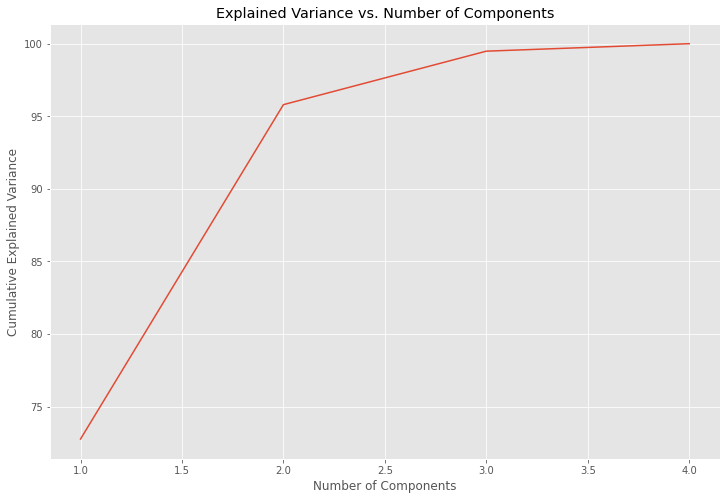

In [32]:
#visualize
sns.lineplot(x=[1, 2, 3, 4],
             y=cumulative_variance_explained)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')

## Project Data Onto Lower-Dimensional Linear Subspace
---

In [33]:
eigen_vectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [35]:
#create projection matrix
projection_matrix = (eigen_vectors.T[:][:])[:2].T #only take the first 2 
projection_matrix

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

In [36]:
X_pca = X.dot(projection_matrix)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


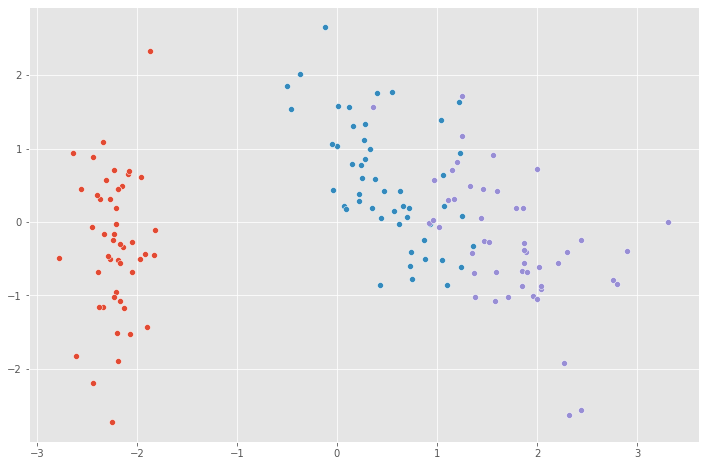

In [37]:
#plot our transformed data
for species in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
  sns.scatterplot(X_pca[y==species, 0],
                  X_pca[y==species, 1])